In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from scipy.stats import f, t
import csv

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
data = pd.read_csv('task2.txt', sep=';')

In [3]:
data.head()

,TB,cost,earnings
0,1,30.4628,43.5693
1,1,23.3598,39.8313
2,1,22.1244,37.8345
3,1,25.5728,41.1167
4,1,19.3586,32.4753


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TB        521 non-null    int64  
 1   cost      521 non-null    float64
 2   earnings  521 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 12.3 KB


In [5]:
#Посчитаем разность cost и earnings 

data['difference'] = data.earnings - data.cost

In [6]:
# Опишем полученные данные, процентиль 50% соотретствует медиане

data.groupby('TB').describe()

cost                                                                \
   count       mean       std      min        25%       50%        75%   
TB                                                                       
1    8.0  24.001250  3.735530  19.3586  21.598175  23.50395  26.045600   
2    9.0  24.333589  6.334869  16.2568  19.387700  22.67180  28.679300   
3   14.0  23.978450  6.786348  15.6945  18.026350  22.61950  29.901825   
4    4.0  24.302775  3.378164  20.2257  22.415925  24.46510  26.351950   
5    9.0  22.295756  6.144413  15.8173  17.335200  19.94180  26.095300   
6   10.0  23.720420  4.240924  17.6241  21.701350  22.10980  24.878225   
7    7.0  27.244786  7.228116  17.0286  21.273750  31.11410  32.853100   
8    9.0  25.761822  6.337819  17.2339  20.492500  28.86410  30.402900   
9    9.0  24.878067  5.738672  17.3760  20.165800  24.44230  29.167500   
10   8.0  27.017562  4.329258  19.2713  25.820575  27.43005  29.256975   
11   9.0  19.876844  4.889983  15.4349  16.720800  18.21170  19.394200   
12   8.0  25.009912  5.781667  18.5911  21.406475  23.48935  28.037000   
13   5.0  29.089220  5.791189  19.9788  27.353000  30.29020  33.615800   
14   8.0  22.046388  6.561650  16.1004  17.204425  19.72680  24.569975   
15   8.0  25.599575  5.433465  17.1715  22.541275  24.81740  30.429000   
16   7.0  21.604757  6.828126  16.1284  17.426050  19.11440  23.295300   
17   4.0  22.522700  4.839537  18.3375  18.616725  21.73370  25.639675   
18   9.0  27.794711  6.875714  15.4844  26.693400  29.34650  32.605600   
19  11.0  25.121273  4.866401  18.3614  20.902900  25.02920  28.768350   
20  10.0  21.084290  6.566982  14.8035  17.867200  18.51080  20.610075   
21  19.0  23.936126  5.130987  16.1804  20.470100  22.06780  28.752250   
22  19.0  24.252363  3.683159  16.8168  21.977150  24.61770  26.371400   
23  18.0  22.459194  5.184726  14.4119  18.978825  22.69420  27.042500   
24  22.0  24.143477  4.922199  14.7303  20.087600  25.06880  27.446800   
25  21.0  23.753381  4.942844  14.1199  20.895800  23.41000  27.712900   
26  14.0  21.839250  5.655256  14.2649  16.814750  22.39840  26.006100   
27  13.0  24.695492  6.580051  14.1929  21.826200  24.60030  29.729500   
28  12.0  23.209692  4.128890  16.0717  20.442450  23.58855  25.934700   
29  14.0  22.949557  5.988817  15.1019  19.281075  20.83600  28.171425   
30  15.0  24.304640  4.545937  15.5985  22.046400  24.92680  26.309750   
31  17.0  24.250118  5.916328  14.6983  18.558400  25.02850  29.466900   
32  13.0  23.954746  4.299947  17.4060  20.839400  22.26660  27.609300   
33  18.0  22.656556  4.574833  16.5765  18.436750  22.81720  26.398050   
34  14.0  22.066500  3.719472  17.2377  18.818125  21.75390  23.262450   
35  15.0  22.385740  5.575897  13.7845  17.851150  22.30940  27.667300   
36   9.0  17.718956  2.231052  15.2856  15.938400  17.21760  18.687300   
37   8.0  18.950762  1.935675  15.2326  18.320050  19.50440  20.076075   
38   6.0  21.396167  2.734524  18.6248  19.574650  20.81870  22.296075   
39   5.0  17.861840  5.732919  10.0000  16.351300  16.39250  21.487600   
40   6.0  19.125200  2.800146  15.8505  16.721225  19.29255  21.620725   
41   7.0  17.706014  2.343899  15.4522  16.502900  16.79260  18.111750   
42   3.0  17.373433  2.681134  15.1347  15.887800  16.64090  18.492800   
43  13.0  18.266277  3.801741  11.4701  15.467800  19.06650  20.965500   
44   9.0  19.199867  2.390389  16.5539  17.177600  18.97930  21.019200   
45   8.0  18.173825  3.946478  12.6030  16.073025  17.23815  20.766100   
46   8.0  17.834913  3.388475  13.4686  15.518925  16.81010  20.570050   
47  11.0  18.159391  3.749607  12.5082  16.411900  17.24460  20.268950   
48   2.0  15.986950  1.404385  14.9939  15.490425  15.98695  16.483475   
49   7.0  19.441886  3.960648  14.0676  16.868700  20.58600  21.037700   
50   9.0  18.505067  2.385129  14.8277  16.681000  18.81770  20.720500   

            earnings             ...                     difference  \
        ma

#### Построим совместный scatter-plot и гистограмму распределения cost и earnings

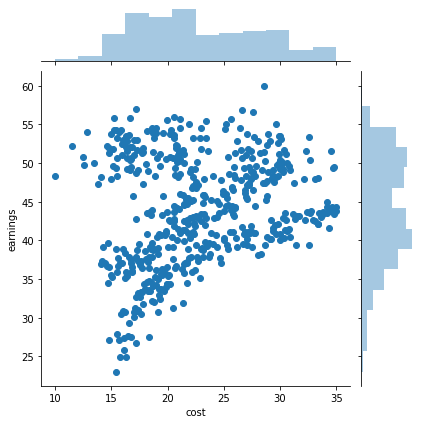

In [7]:
sns.jointplot(x='cost', y='earnings', 
              data=data, kind='scatter')


#### Рассмотрим поведение cost и earnings для различных терабанков

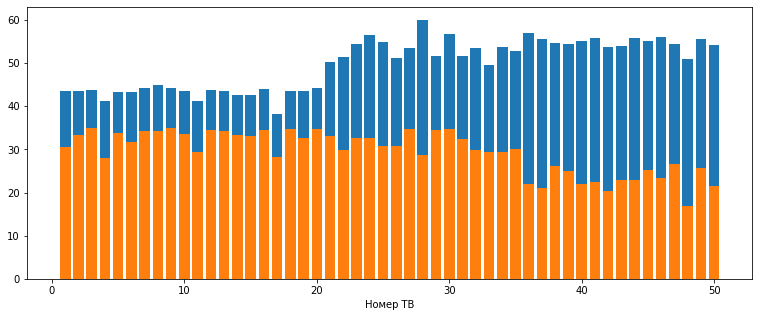

In [8]:
fig, ax = plt.subplots()

ax.bar(data.TB, data.earnings)
ax.bar(data.TB, data.cost)

fig.set_figwidth(13)
fig.set_figheight(5) 
plt.xlabel('Номер TB')

plt.show()

#### Составим рейтинг тербанков по разности cost и earnings

In [9]:
data_rating = data.groupby('TB').sum()
data_rating.sort_values(['difference'], ascending=False)

,cost,earnings,difference
TB,,,
24,531.1565,1008.0621,476.9056
25,498.8210,955.7621,456.9411
43,237.4616,677.2837,439.8221
23,404.2655,801.9818,397.7163
22,460.7949,857.6267,396.8318
21,454.7864,847.7123,392.9259
33,407.8180,775.3473,367.5293
47,199.7533,563.9371,364.1838
31,412.2520,751.0518,338.7998


In [10]:
#data_rating.loc[data_rating.difference > data_rating.difference.mean()].sort_values(['difference'], ascending=False)

#### Посмотрим на корреляцию признаков

In [11]:
data.loc[:, ['earnings', 'cost']].corr()

,earnings,cost
earnings,1.000000,0.225533
cost,0.225533,1.000000


#### Поскольку коррелция признаков не очень высокая, попробуем применить линейную регрессию. Попробуем оценить обобщающую способность модели, поочередно отделяя по одному тербанку от общей выборки. Затем рассмотрим ошибки предсказания модели для разных тербанков.

In [12]:
# Напишем функцию, делающую кросс-валидацию, путем взятия каждого тербанка для тестовой выборки

def myCV(data):
    regr = LinearRegression()
    error = []
    for i in range(1, 50):
        train = data.earnings[data.TB!=i].to_numpy().reshape((-1, 1))
        y = data.cost[data.TB!=i].to_numpy().reshape((-1, 1))
        test = data.earnings[data.TB==i].to_numpy().reshape((-1, 1))
        y_test = data.cost[data.TB==i].to_numpy().reshape((-1, 1))
        regr.fit(train, y)
        error.append(mean_squared_error(regr.predict(test), y_test))

    return np.array(error)

In [13]:
linear_scoring = myCV(data)

In [14]:
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 32.396641113344195, std: 16.48027812396068


#### Относительно высокая дисперсия по кросс-валидации может быть объяснена тем, что в некоторых тербанках очень мало наблюдений

#### Так как MSE чувствительна к выбросам, попробуем найти выбросы в наших данных

Чтобы проверить имеются ли в выборке выбросы для каждого $x_i$, $i = 0, \ldots, n$, по всем $N = n - 1$ векторам наблюдений, исключая $x_i$, вычисляются $\bar x_i$, ковариционная матрица $\hat \Sigma_i$ и расстояние Махаланобиса $D^2_i$ между $x_i$ и $\bar x_i$ и соответствующие *p-value* $p_i$.,

Расстояние Махаланобиса:
$$D^2_p = (x - \hat x)^T\hat \Sigma^{-1}(x - \hat x)$$ <br>
$$\frac{(N - p)N}{(N^2 - 1)p}D^2 \sim F(p, N - p)$$

In [15]:
#Расстояние Махаланобиса

def outlier(x, data):
    means = data.mean(0)
    d = x - means
    d = d.reshape(d.shape[0], 1)
    Sigma = np.cov(data, rowvar=False)
    return d.T.dot(np.linalg.inv(Sigma)).dot(d).item()

In [16]:
def outlier_stat(data):
    X = data.to_numpy()
    p_val = np.array(list())
    d2 = np.array(list())
    N = X.shape[0]
    p = X.shape[1]
    for i in range(X.shape[0]):
        X_i = np.delete(X, i, axis=0)
        D2_i = outlier(X[i], X_i)
        temp = (N - p) * N * D2_i / ((N**2 - 1) * p)
        d2 = np.append(d2, D2_i)
        p_val = np.append(p_val, f.sf(temp, X.shape[1], X.shape[0] - X.shape[1]))
        
    return d2, p_val


In [17]:
data['D2'], data['p-value'] = outlier_stat(data.loc[:, ['earnings', 'cost']])


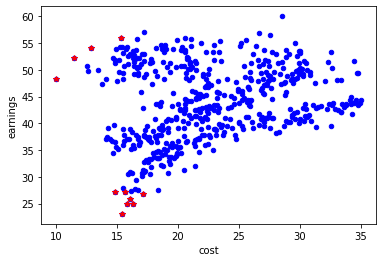

In [18]:
data.plot(y='earnings', x='cost', kind='scatter', color='blue')
plt.plot(data[data['p-value'] < 0.05]['cost'], data[data['p-value'] < 0.05]['earnings'], 'r*')

In [19]:
data[data['p-value'] < 0.05]

,TB,cost,earnings,difference,D2,p-value
18,3,15.6945,27.0727,11.3782,6.388113,0.042322
37,5,15.8173,24.8901,9.0728,7.884407,0.020289
88,11,16.3388,24.9000,8.5612,7.752388,0.021647
90,11,15.4349,23.0583,7.6234,9.436406,0.009485
115,14,16.1004,25.8336,9.7332,7.121960,0.029502
121,15,17.1715,26.7146,9.5431,6.276867,0.044703
162,20,14.8035,27.1138,12.3103,6.652501,0.037160
416,36,15.2856,55.8793,40.5937,6.240276,0.045515
434,39,10.0000,48.2858,38.2858,6.925827,0.032487
461,43,12.8819,54.0156,41.1337,6.968738,0.031809


#### Таким образом, были найдены выбросы в данных. Теперь построим регрессию без этих наблюдений

In [20]:
data_new = data[data['p-value'] > 0.05]

In [21]:
linear_scoring = myCV(data_new)

In [22]:
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 31.532365376981627, std: 15.546638037684566


#### После исключения выбросов замечены снижение дисперсии и среднего значения MSE по кросс-валидации. По результатам кросс-валидации мы можем заключить, что модель, построенная по данным, неплохо справляется с предсказанием данных вне зависимости от номера тербанка, что свидетельствует о хорошей обобщающей способности.

С помощью критерия Левене проверим гипотезу о равенстве дисперсии между наблюдениями в разных тербанках

In [23]:
from scipy.stats import levene

def generate_by_terbank(data, columnname):
    samples_array = []
    for i in range(1, 51):
        samples_array.append(data[columnname][data.TB==i].to_numpy())

    return np.array(samples_array)

In [25]:
samples = generate_by_terbank(data, 'cost')

print(levene(*samples))

LeveneResult(statistic=1.2915233616247157, pvalue=0.096300886488345)


<ipython-input-23-862525dd067b>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(samples_array)


#### p-value критерия Левене больше 0.05 для признака cost, следовательно, нет оснований отклонить гипотезу о равентсве дисперсий между группами.

#### Таким образом, по проведенному анализу можно сделать вывод об общей однородности данных среди разных тербанков.